In [12]:
import pandas as pd
import re
import plotly.express as px
import plotly.graph_objects as go

In [2]:
def extraer_nota(nota):
    match = re.match(r'(\d+)\s*/\s*\d+', nota)
    if match:
        return int(match.group(1))
    else:
        return None

In [157]:
df_pe_primer_examen = pd.read_excel('../data/examenes/1er_modulo/Notas-primer-examen.xlsx')
df_pe_segundo_examen = pd.read_excel('../data/examenes/1er_modulo/Nota-segundo-examen.xlsx')
df_pe_segundo_examen_martes = pd.read_excel('../data/examenes/1er_modulo/notas-segundo-Examen-martes.xlsx')
df_pe_primer_recu = pd.read_excel('../data/examenes/1er_modulo/Notas-recuperatorio.xlsx')
df_pe_segundo_recu = pd.read_excel('../data/examenes/1er_modulo/notas-recuperatorio-segundo-examen.xlsx')
df_se_primer_examen = pd.read_excel('../data/examenes/2do_modulo/notas-1examen-segundomodulo.xlsx')
df_se_segundo_examen = pd.read_excel('../data/examenes/2do_modulo/Notas-segundoexamen-modulo2.xlsx')
df_se_primer_recu = pd.read_excel('../data/examenes/2do_modulo/recuperatorio-primerparcial.xlsx')
df_se_segundo_recu = pd.read_excel('../data/examenes/2do_modulo/recuperatorio-segundo.xlsx')
df_te_primer_examen = pd.read_excel('../data/examenes/3er_modulo/notas-tercermodulo-primerexamen.xlsx')

In [158]:
df_pe_primer_examen = df_pe_primer_examen.assign(EXAMEN='primer')
df_pe_primer_examen = df_pe_primer_examen.assign(RECUPERATORIO=False)
df_pe_primer_examen = df_pe_primer_examen.assign(ETAPA='primera')
df_pe_primer_examen['NOTA'] = df_pe_primer_examen['NOTA'].apply(extraer_nota)
df_pe = df_pe_primer_examen[['NOTA', 'EXAMEN', 'RECUPERATORIO', 'ETAPA']]

df_pe_segundo_examen = df_pe_segundo_examen.assign(EXAMEN='segundo')
df_pe_segundo_examen = df_pe_segundo_examen.assign(RECUPERATORIO=False)
df_pe_segundo_examen = df_pe_segundo_examen.assign(ETAPA='primera')
df_pe_segundo_examen['NOTA'] = df_pe_segundo_examen['Nota Segundo examen']
df_pe_segundo_examen = df_pe_segundo_examen[['NOTA', 'EXAMEN', 'RECUPERATORIO', 'ETAPA']]
df_pe = pd.concat([df_pe, df_pe_segundo_examen], ignore_index=True)

df_pe_segundo_examen_martes = df_pe_segundo_examen_martes.assign(EXAMEN='segundo')
df_pe_segundo_examen_martes = df_pe_segundo_examen_martes.assign(RECUPERATORIO=False)
df_pe_segundo_examen_martes = df_pe_segundo_examen_martes.assign(ETAPA='primera')
df_pe_segundo_examen_martes['NOTA'] = df_pe_segundo_examen_martes['Nota segundo Examen'].apply(extraer_nota)
df_pe_segundo_examen_martes = df_pe_segundo_examen_martes[['NOTA', 'EXAMEN', 'RECUPERATORIO', 'ETAPA']]
df_pe = pd.concat([df_pe, df_pe_segundo_examen_martes], ignore_index=True)

df_pe_primer_recu = df_pe_primer_recu.assign(EXAMEN='primer')
df_pe_primer_recu = df_pe_primer_recu.assign(RECUPERATORIO=True)
df_pe_primer_recu = df_pe_primer_recu.assign(ETAPA='primera')
df_pe_primer_recu['NOTA'] = pd.to_numeric(df_pe_primer_recu['NOTA'], errors='coerce')
df_pe_primer_recu = df_pe_primer_recu[['NOTA', 'EXAMEN', 'RECUPERATORIO', 'ETAPA']]
df_pe = pd.concat([df_pe, df_pe_primer_recu], ignore_index=True)

df_pe_segundo_recu = df_pe_segundo_recu.assign(EXAMEN='segundo')
df_pe_segundo_recu = df_pe_segundo_recu.assign(RECUPERATORIO=True)
df_pe_segundo_recu = df_pe_segundo_recu.assign(ETAPA='primera')
df_pe_segundo_recu['NOTA'] = df_pe_segundo_recu['Nota del recuperatorio']
df_pe_segundo_recu = df_pe_segundo_recu[['NOTA', 'EXAMEN', 'RECUPERATORIO', 'ETAPA']]
df_pe = pd.concat([df_pe, df_pe_segundo_recu], ignore_index=True)

df_se_primer_examen = df_se_primer_examen.assign(EXAMEN='primer')
df_se_primer_examen = df_se_primer_examen.assign(RECUPERATORIO=False)
df_se_primer_examen = df_se_primer_examen.assign(ETAPA='segunda')
df_se_primer_examen['NOTA'] = pd.to_numeric(df_se_primer_examen['Puntuación'], errors='coerce')
df_se_primer_examen = df_se_primer_examen[['NOTA', 'EXAMEN', 'RECUPERATORIO', 'ETAPA']]
df_pe = pd.concat([df_pe, df_se_primer_examen], ignore_index=True)

df_se_segundo_examen = df_se_segundo_examen.assign(EXAMEN='segundo')
df_se_segundo_examen = df_se_segundo_examen.assign(RECUPERATORIO=False)
df_se_segundo_examen = df_se_segundo_examen.assign(ETAPA='segunda')
df_se_segundo_examen = df_se_segundo_examen[['NOTA', 'EXAMEN', 'RECUPERATORIO', 'ETAPA']]
df_pe = pd.concat([df_pe, df_se_segundo_examen], ignore_index=True)

df_se_primer_recu = df_se_primer_recu.assign(EXAMEN='primer')
df_se_primer_recu = df_se_primer_recu.assign(RECUPERATORIO=True)
df_se_primer_recu = df_se_primer_recu.assign(ETAPA='segunda')
df_se_primer_recu['NOTA'] = df_se_primer_recu['Nota']
df_se_primer_recu = df_se_primer_recu[['NOTA', 'EXAMEN', 'RECUPERATORIO', 'ETAPA']]
df_pe = pd.concat([df_pe, df_se_primer_recu], ignore_index=True)

df_se_segundo_recu = df_se_segundo_recu.assign(EXAMEN='segundo')
df_se_segundo_recu = df_se_segundo_recu.assign(RECUPERATORIO=True)
df_se_segundo_recu = df_se_segundo_recu.assign(ETAPA='segunda')
df_se_segundo_recu = df_se_segundo_recu[['NOTA', 'EXAMEN', 'RECUPERATORIO', 'ETAPA']]
df_pe = pd.concat([df_pe, df_se_segundo_recu], ignore_index=True)

df_te_primer_examen = df_te_primer_examen.assign(EXAMEN='primer')
df_te_primer_examen = df_te_primer_examen.assign(RECUPERATORIO=False)
df_te_primer_examen = df_te_primer_examen.assign(ETAPA='tercera')
df_te_primer_examen = df_te_primer_examen[['NOTA', 'EXAMEN', 'RECUPERATORIO', 'ETAPA']]
df_pe = pd.concat([df_pe, df_te_primer_examen], ignore_index=True)

In [159]:
df_pe['APRUEBA'] = df_pe['NOTA'].apply(lambda x: 'Si' if x >= 6 else 'No')

In [170]:
df_pe.sample(10)

,NOTA,EXAMEN,RECUPERATORIO,ETAPA,APRUEBA
176,6.0,primer,False,primera,Si
1011,9.0,primer,False,primera,Si
2966,6.0,segundo,True,primera,Si
3076,9.0,segundo,True,primera,Si
6052,8.0,primer,False,tercera,Si
737,9.0,primer,False,primera,Si
4667,8.0,segundo,False,segunda,Si
5854,6.0,primer,False,tercera,Si
1806,7.0,segundo,False,primera,Si
6137,9.0,primer,False,tercera,Si


In [161]:
df_pe.describe()

,NOTA
count,6263.000000
mean,8.070733
std,1.824444
min,0.000000
25%,7.000000
50%,8.000000
75%,10.000000
max,10.000000


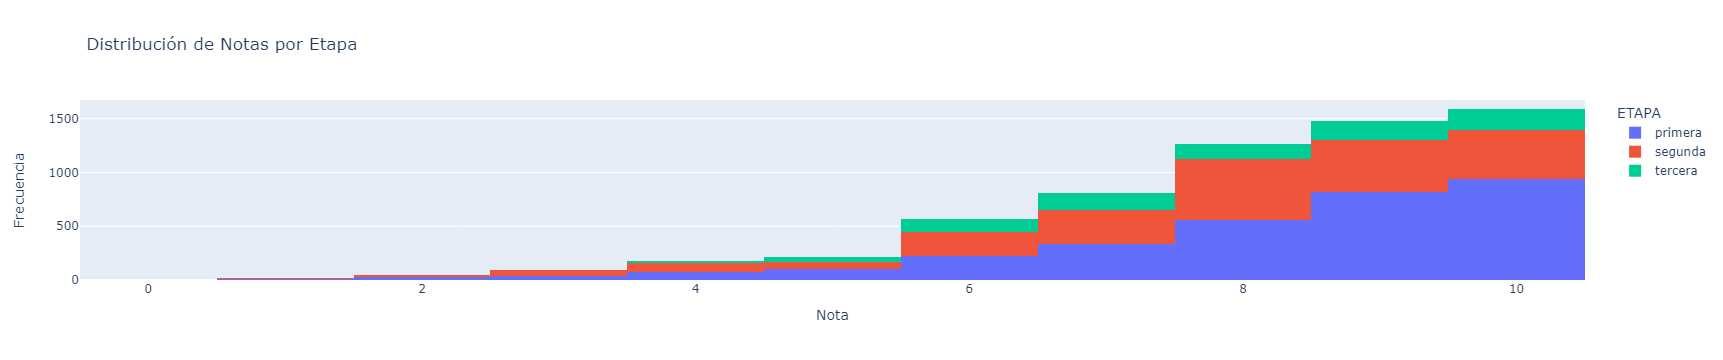

In [172]:
fig = px.histogram(df_pe, x="NOTA", color="ETAPA", title="Distribución de Notas por Etapa")
fig.update_xaxes(title_text="Nota")
fig.update_yaxes(title_text="Frecuencia")
fig.show()

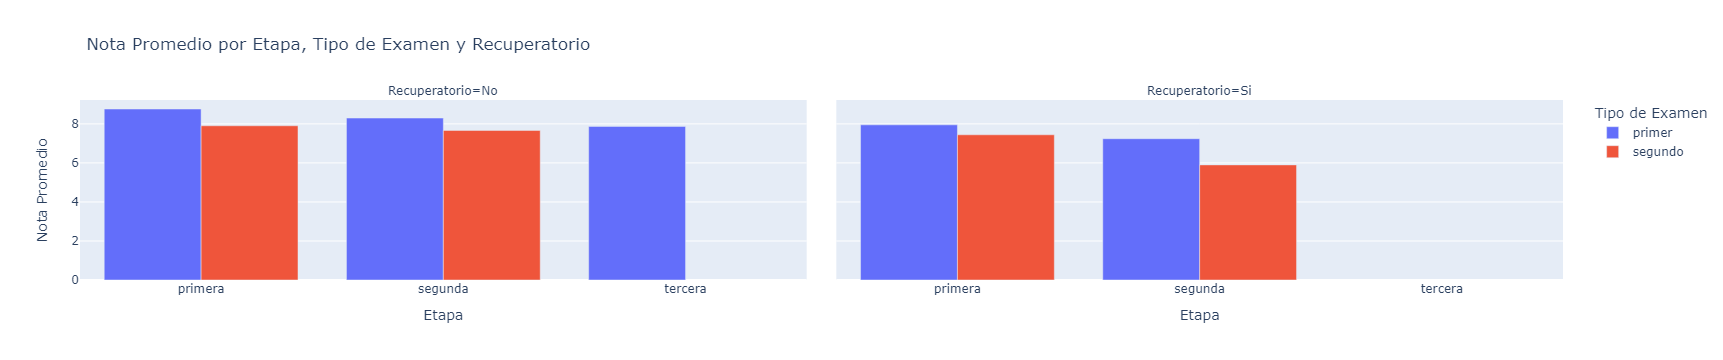

In [176]:
nota_promedio_por_etapa_tipo_recuperatorio = df_pe.groupby(["ETAPA", "EXAMEN", "RECUPERATORIO"])["NOTA"].mean().reset_index()
nota_promedio_por_etapa_tipo_recuperatorio['RECUPERATORIO'] = nota_promedio_por_etapa_tipo_recuperatorio['RECUPERATORIO'].apply(lambda x: 'Si' if x else 'No')

fig = px.bar(nota_promedio_por_etapa_tipo_recuperatorio, x="ETAPA", y="NOTA", color="EXAMEN",
             facet_col="RECUPERATORIO",
             title="Nota Promedio por Etapa, Tipo de Examen y Recuperatorio",
             labels={"ETAPA": "Etapa", "NOTA": "Nota Promedio", "EXAMEN": "Tipo de Examen", "RECUPERATORIO": "Recuperatorio"},
             barmode="group")
fig.show()

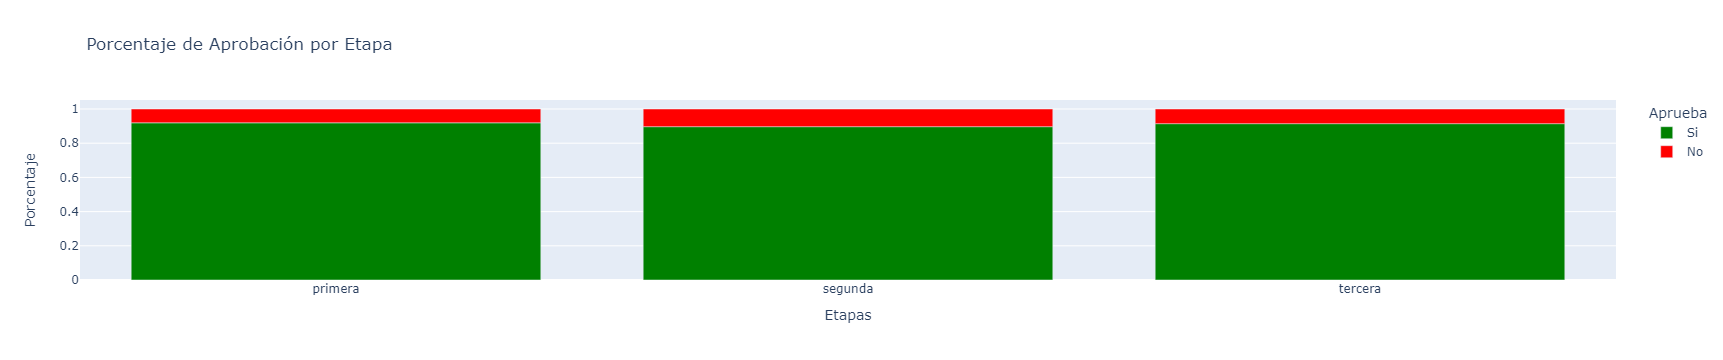

In [182]:
porcentaje_aprobacion_por_etapa = df_pe.groupby("ETAPA")["APRUEBA"].value_counts(normalize=True).unstack().fillna(0)
porcentaje_aprobacion_por_etapa.reset_index(inplace=True)

fig = px.bar(porcentaje_aprobacion_por_etapa, x="ETAPA", y=["Si", "No"],
             title="Porcentaje de Aprobación por Etapa",
             labels={"ETAPA": "Etapas", "value": "Porcentaje", "variable": "Aprueba"},
             color_discrete_sequence=["green", "red"])
fig.show()

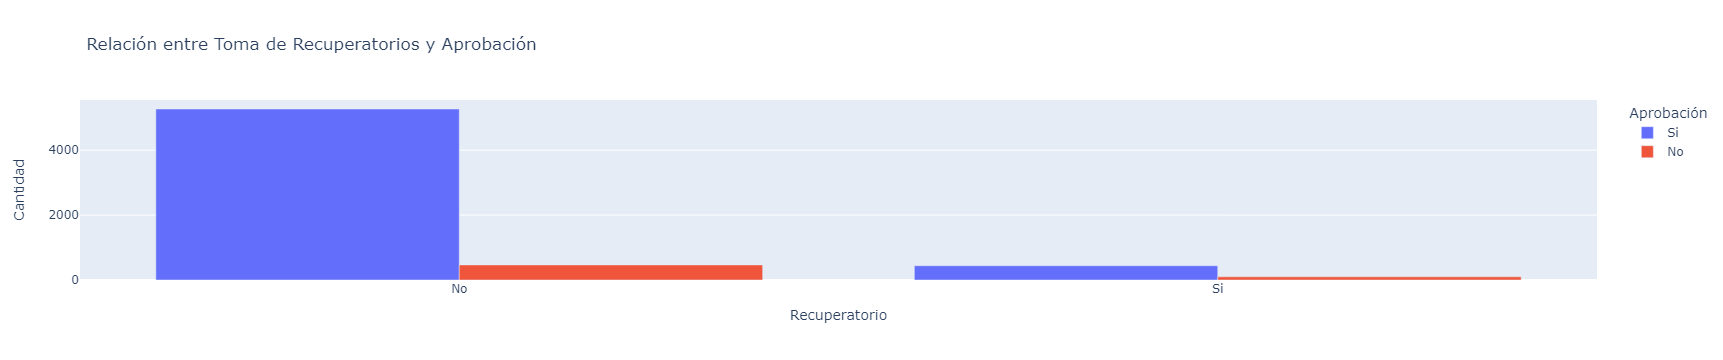

In [179]:
relacion_recuperatorios_aprobacion = df_pe.groupby(["RECUPERATORIO", "APRUEBA"]).size().unstack(fill_value=0).reset_index()
relacion_recuperatorios_aprobacion['RECUPERATORIO'] = relacion_recuperatorios_aprobacion['RECUPERATORIO'].apply(lambda x: 'Si' if x else 'No')

fig = px.bar(relacion_recuperatorios_aprobacion, x="RECUPERATORIO", y=["Si", "No"],
             title="Relación entre Toma de Recuperatorios y Aprobación",
             labels={"RECUPERATORIO": "Recuperatorio", "variable": "Aprobación", "value": "Cantidad"},
             barmode="group")
fig.show()